# Exercise 1 - Linear Regression

The first exercise is about linear models.
The given data set contains prices and other attributes of approximately 54,000 diamonds. You should fit a linear model to predict the price of a diamond, given its attributes.

This exercise is meant to get you started with the tool stack. Besides numpy and matplotlib we use the following python packages:

- [pandas](https://pandas.pydata.org/)
- [sklearn](http://scikit-learn.org/)

If you are unfamiliar with them, follow the documentation links. 

In the event of a persistent problem, do not hesitate to contact the course instructor under

- paul.kahlmeyer@uni-jena.de

### Submission
- Deadline of submission:
        19.04.23 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=43681)


### Help
In case you cannot solve a task, you can use the saved values within the `help` directory:
- Load arrays with [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.load.html)
```
np.load('help/array_name.npy')
```
- Load functions with [Dill](https://dill.readthedocs.io/en/latest/dill.html)
```
import dill
with open('help/some_func.pkl', 'rb') as f:
    func = dill.load(f)
```

to continue working on the other tasks.

## Preprocessing

We use the same notation as in the lecture.
- $m$... Number of datapoints
- $n$... Number of features

### Dataset 

As a dataset, we use the [diamond dataset](https://www.kaggle.com/shivam2503/diamonds).

Each element in this dataset represents a diamond and has the following features:

- price: price in US dollars (326.0 - 18823.0)
- carat: weight of the diamond (0.2 - 5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0-10.74)
- y: width in mm (0-58.9)
- z: depth in mm (0-31.8)
- depth: total depth percentage = 2 * z / (x + y) (43-79)
- table: width of top of diamond relative to widest point (43-95)

The dataset is stored under `diamonds.csv`.

### Task 1
Import the data from the file using [pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and examine it.

Determine the following:

* The number of data points
* The column names
* The data types for each column

In [2]:
# load data
import pandas as pd

df = pd.read_csv('./diamonds.csv')

# determine number of datapoints
print("Number of data points:", len(df))

# determine column names
print("Column names:", list(df.columns))

# determine datatypes of columns
print(df.dtypes)

Number of data points: 53940
Column names: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


### Task 2

Since there are discrete variables and we do not yet know how to include them into our regression model, remove them. Additionally, verify that there are no missing values in our dataset.

Hint: there are multiple ways to [check](https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345) for missing values

In [3]:
# remove discrete variables + check for missing values
df = df.drop(["cut", "color", "clarity"], axis=1)

print(df.isnull().sum())


carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64


As discussed in the lecture, we should **standardize** the data, to make different scales comparable.

Standardization is defined for each feature $x_i$:

\begin{align}
\hat{x}_i = \cfrac{x_i-\mu_x}{\sigma_x}\,,
\end{align}
where $\mu_x$ and $\sigma_x$ are the empirical [mean](https://en.wikipedia.org/wiki/Mean) and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of the feature $x$.

### Task 3

Convert the pandas dataframe to a numpy array and calculate the standardized data matrix $X$.

In [4]:
# calculate standardized data matrix X
import numpy as np

# convert dataframe to numpy array
X = df.to_numpy()

# calculate empirical mean and standard deviation
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# standardize data using formula
X_std = (X - mean) / std

### Task 4

Scikit learn has an [implementation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) of this preprocessing.

Use it to create a second standardized data matrix and compare this result with your result from Task 3.

In [5]:
# compare to sklearn result
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sklearn = scaler.fit_transform(X)

np.allclose(X_std, X_sklearn)

True

## Inspecting the Data

Visualizing correlation in your data often helps to build intuition and get a feeling of the deeper mojo in the set.

Here we want to use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) as a measure for correlation between two variables.

Let $x$ and $y$ be two variables of the unstandardized dataset (e.g. `carat` and `price`). The empirical Pearson correlation coefficient between $x$ and $y$ is defined as 

\begin{align}
r_{xy} = \cfrac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}\,,
\end{align}
where $\bar{x}$ and $\bar{y}$ are the respective empirical means.

### Task 5

How does this definition translate to our standardized data matrix $X$?

Calculate the pairwise correlation matrix for our dataset. 

Visualize this correlation matrix and label the rows/columns.

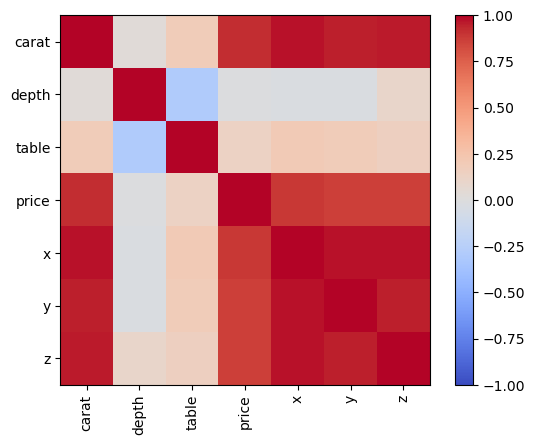

In [6]:
# calculate correlation matrix
corr_matrix = np.corrcoef(X_std.T)

# visualize correlation matrix
import matplotlib.pyplot as plt

# plot correlation matrix
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()

# add labels to rows/columns
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)

# display plot
plt.show()


## Linear Regression

Our goal in this exercise will be to predict the `price` of a diamond based on some of its other features.

We will use linear regression, that is we assume the `price` (=$y$) depends linearly on the other features (=$\mathbf{x}$):
\begin{align}
y = \theta^T \mathbf{x} + \varepsilon
\end{align}
where $\varepsilon$ is standard normal distributed noise.

In `Linear_Regression_Script.pdf` you find how the maximum likelihood estimate $\hat\theta$ is calculated.

### Task 6

Implement a `LinReg` class that uses maximum likelihood estimation. Add the possibility to use [Ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression).

In [7]:
class LinReg():
    
    def __init__(self, c:int = 0):
        '''
        Class for linear regression.
        
        @Params:
            c... parameter for ridge regression
        '''
        # create attributes: c, theta 
        self.c = c
        self.theta = None
    
        pass
    
    def fit(self, X:np.ndarray, Y:np.ndarray) -> None:
        '''
        Learns the parameters for a linear regression task.
        
        @Params:
            X... n x m matrix
            Y... vector of length m
        '''
        
        # estimate theta
        if self.c == 0:
            self.theta = np.linalg.inv(X.dot(X.T)).dot(X).dot(Y)
        else:
            self.theta = np.linalg.inv(X.dot(X.T) + self.c*np.eye(len(X))).dot(X).dot(Y)
        pass
        
    def predict(self, X:np.ndarray) -> np.ndarray:
        '''
        Using learned parameters, predicts output for given X.
        
        @Params:
            X... n x m matrix
            Y... vector of length m
        '''
        
        # predict labels
        Y_pred = self.theta.dot(X)
        
        return Y_pred
        pass
    

### Task 7

First we want to predict the `price` of a diamond solely from the variable `carat`. 
Make a scatter plot of `carat` vs `price` using matplotlib. Label the axes and give the plot a title.

Use the standardized dataset.

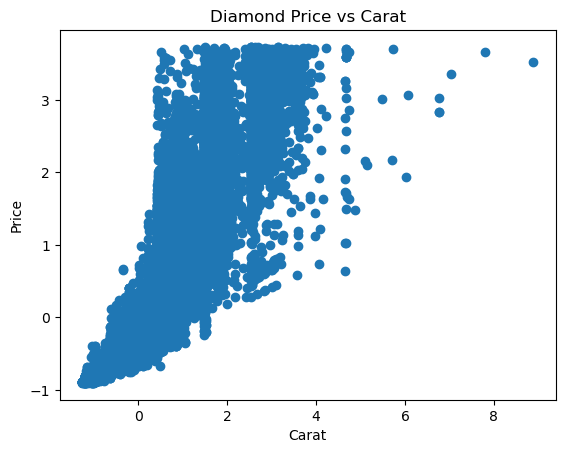

In [8]:
# display data in scatter plot
import matplotlib.pyplot as plt
l1 = []
l2 = []

l1 = X_std[:, 0]
l2 = X_std[:, 3]

# create scatter plot
plt.scatter(l1, l2)

# add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Price vs Carat')

# show plot
plt.show()

### Task 8

Set up the design matrix and use your class to estimate $\theta$ on the dataset.
Note, that the design matrix does **not** need the vector of ones, since we standardized the dataset.

Plot the regression line defined by $\theta$.

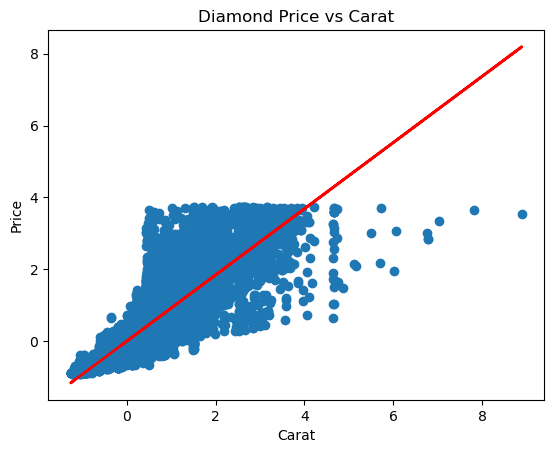

In [9]:
# build design matrix, y
X = X_std[:, 0].reshape(-1, 1).T
y = X_std[:, 3].reshape(-1, 1)

# use Linear Regression
reg = LinReg(0.3)
reg.fit(X, y)

# plot data + regression line
plt.scatter(l1, l2)
plt.plot(X.T, reg.predict(X).flatten(), color='red', linewidth=2)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Price vs Carat')
plt.show()

### Task 9

You can find an implementation of this method in the python module [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Use it and compare your result for the estimation of $\theta$.

**Important:** scikit learn needs the design matrix as a $m \times n$ matrix (datapoints as rows).

In [10]:
# estimate theta
from sklearn.linear_model import LinearRegression

reg_sklearn = LinearRegression().fit(X.T, y)

# compare results
print("Manual implementation: ", reg.theta)
print("Scikit-learn implementation: ", reg_sklearn.coef_)
print("Relative default: ", np.abs((reg.theta - reg_sklearn.coef_)/reg_sklearn.coef_))


Manual implementation:  [[0.92158618]]
Scikit-learn implementation:  [[0.9215913]]
Relative default:  [[5.56170433e-06]]


### Task 10

Now predict the `price` from the variables `carat`, `depth`, `table`, `x`, `y`, `z`.

- Estimate $\theta$ with your class
- Estimate $\theta$ with scikit learn
- Compare both estimations

In [31]:
# build X, Y
X = np.delete(X_std, 3, axis=1).T
y = X_std[:, 3]

# estimate theta
lr = LinReg()
lr.fit(X, y)

# estimate theta using scikit-learn
reg_sklearn = LinearRegression().fit(X.T, y)

# compare theta 
print("Manual implementation: ", lr.theta)
print("Scikit-learn implementation: ", reg_sklearn.coef_)

# calculate relative default
rf = np.abs((lr.theta - reg_sklearn.coef_)/reg_sklearn.coef_)
print("Relative default: ", rf)

Manual implementation:  [ 1.26970978 -0.07295331 -0.05737995 -0.36994281  0.01898718  0.00736359]
Scikit-learn implementation:  [ 1.26970978 -0.07295331 -0.05737995 -0.36994281  0.01898718  0.00736359]
Relative default:  [1.60887976e-14 8.17981927e-15 2.29764909e-15 4.38155731e-14
 8.40538607e-15 6.37246768e-14]
